# Condiciones de entrega


Además de realizar al menos un envío replicando los resultados del paper antes mencionados, se deberá entregar el código del trabajo práctico junto a un breve informe que explique la idea del modelo implementado y una indicación de cómo ejecutar el programa si fuera necesaria. Ambos elementos se deben subir a un repositorio en github y enviar el link vìa campus. El trabajo podrá hacerse en grupos de hasta 3 personas. Los integrantes deben estar registrados enviando mail a cselmo@itba.edu.ar

# Fecha de entrega del TP


Para la evaluaciòn del TP como tal la fecha de vencimiento es el 27 de septiembre a las 23:59hs. Para dicha fecha deberán resolver el problema utilizando un clasificador de texto basado en Naive Bayes Multinomial y otro en MLP. La estructura de validación debe quedar perfectamente clara en el informe (Hold-out Validation, K-folding, etc).

# Para la evaluación del TP se debe informar claramente:

1) Técnica de validación utilizada. La metodología con respecto a este punto debe ser impecable.

2) Elección de una métrica primaria

3) Informar las métricas secundarias: Precision, Recall, F1-Score y ROC-AUC, explicando claramente qué mide cada una de ellas, sus ventajas y desventajas.

4) Para las métricas mencionadas anteriormente realizar una interpretaciòn y comparación para el modelo NBMN y MLP.

5) En las conclusiones informar si el dataset posee o no sesgos en el armado de los datos.

# Librerías utilizadas

In [2]:
 pip install dask[dataframe] --upgrade

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [3]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
#Para el preprocesado
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Para los modelos
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Importamos los datos de la competencia

# Cargar datos desde la carpeta de drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cargo los datos
df_train = pd.read_hdf("/content/drive/MyDrive/Redes TPS/TP Redes 1/train_data.hdf5")
df_valid = pd.read_hdf("/content/drive/MyDrive/Redes TPS/TP Redes 1/valid_data.hdf5")
df_test = pd.read_hdf("/content/drive/MyDrive/Redes TPS/TP Redes 1/test_data.hdf5")
df_submission = pd.read_csv("/content/drive/MyDrive/Redes TPS/TP Redes 1/submission_sample.csv", index_col="pairID")

### Vamos a generar un modelo con MLPClassifier de Scikit learn

Esto genera un Multiple Layer Percepron a partir de diferentes parámetros, como cantidad de capas ocultas, función de activación, entre otras

## Verificamos la variabilidad de los resultados 

* dependiendo de la partición del conjunto de entrenamiento y validación 
* con el modelo MLPClassifier de Scikit Learn

Solo para comprobar, vamos a juntar en un mismo dataframe validación y entrenamiento para realizar 3 particiones de ese dataset total y verificar que los resultados del modelo no varíen demasiado.

In [9]:
df_concat = pd.concat([df_train, df_valid])
df_concat

,gold_label,text
pairID,,
1000092795.jpg#0r1c,contradiction,they are inside of a house
1000092795.jpg#0r1e,entailment,two guys are in a yard
1000092795.jpg#0r1n,neutral,They are doing yardwork
1000092795.jpg#1r1c,contradiction,A man is swimming.
1000092795.jpg#1r1e,entailment,Two young white men are near some bushes.
...,...,...
985982384.jpg#3r1e,entailment,The men and women are dressed in clothes for t...
985982384.jpg#3r1n,neutral,The bathing suits are blue.
98756067.jpg#1r1c,contradiction,Two men trying to dance for a song


In [12]:
train_score = []
valid_score = []
it=3
for i in range(it):
  seed = np.random.randint(0,60000)
  #divido en train y valid
  X_train, X_valid, y_train, y_valid = train_test_split(df_concat[['text']], df_concat[['gold_label']], test_size=0.2, random_state=seed)
  text_train = X_train["text"].tolist()
  text_valid = X_valid["text"].tolist()
  lab_train = y_train["gold_label"].tolist()
  lab_valid = y_valid["gold_label"].tolist()
  #armamos nuestro vocabulario
  cv = CountVectorizer(min_df=100)
  cv_train = cv.fit_transform(text_train)
  cv_valid = cv.transform(text_valid)
  #armamos nuestro modelo y lo entrenamos con el vocbulario de entrenamiento
  clf = MLPClassifier(hidden_layer_sizes=(10,10,10), batch_size=1000, verbose=1)
  clf.fit(X=cv_train, y=lab_train)
  #guardamos los valores del score de train y test para cada iteración
  train_score.append(clf.score(cv_train, lab_train))
  valid_score.append(clf.score(cv_valid, lab_valid))

Iteration 1, loss = 0.94211418
Iteration 2, loss = 0.84715580
Iteration 3, loss = 0.83762450
Iteration 4, loss = 0.83114652
Iteration 5, loss = 0.82556079
Iteration 6, loss = 0.82108821
Iteration 7, loss = 0.81706696
Iteration 8, loss = 0.81383148
Iteration 9, loss = 0.81114776
Iteration 10, loss = 0.80851843
Iteration 11, loss = 0.80632272
Iteration 12, loss = 0.80435895
Iteration 13, loss = 0.80274059
Iteration 14, loss = 0.80135207
Iteration 15, loss = 0.79991097
Iteration 16, loss = 0.79863763
Iteration 17, loss = 0.79767120
Iteration 18, loss = 0.79651151
Iteration 19, loss = 0.79565920
Iteration 20, loss = 0.79484816
Iteration 21, loss = 0.79391581
Iteration 22, loss = 0.79328918
Iteration 23, loss = 0.79268005
Iteration 24, loss = 0.79211675
Iteration 25, loss = 0.79138993
Iteration 26, loss = 0.79078668
Iteration 27, loss = 0.79020667
Iteration 28, loss = 0.78974181
Iteration 29, loss = 0.78930633
Iteration 30, loss = 0.78884599
Iteration 31, loss = 0.78836869
Iteration 32, los

In [11]:
print(f"Scores para el entrenamiento: {train_score}")
print(f"Scores para la validación: {valid_score}") 

Scores para el entrenamiento: [0.6641057565712267, 0.6610903352281237, 0.6620470441494344]
Scores para la validación: [0.6229055274404964, 0.6247563527118614, 0.6232274100963859]


**Como podemos ver previamente en cada iteración la variación tanto del accuracy para el conjunto de entrenamiento como para el conjunto de validación es muy chica, por lo tanto, podemos utilizar el método de validación de Hold out, con los conjuntos establecidos inicialmente. Dichos conjuntos se separarán en sus clases y el texto a procesar, y serán convertidos a listas a continuación.**

In [6]:
text_train = df_train["text"].tolist()
labels_train = df_train["gold_label"].tolist() 
text_val = df_valid["text"].tolist()
labels_val = df_valid["gold_label"].tolist()
text_test = df_test["text"].tolist()

## No hacemos preprocesamiento

En el modelo de Naive Bayes se analizó que los tipos de preprocesamientos del vocabulario propuestos no ayudan a mejorar el score, por lo que inicialmente no se realizará el preprocesamiento de las frases, sino que únicamente se intentará ajustar parámetros estructurales del vocabulario (n-grams, df_min, df_max) e hiperparámetros de la red (Cantidad de capas y perceptrones por capa, función de activación, learning rate, etc) para intentar mejorar el score

Inicialmente se entrenará una red con 3 capas ocultas, cada una con 10 perceptrones

In [14]:

text_train = df_train["text"].tolist()
labels_train = df_train["gold_label"].tolist() 
text_val = df_valid["text"].tolist()
labels_val = df_valid["gold_label"].tolist()
text_test = df_test["text"].tolist()
#armamos nuestro vocabulario
cv = CountVectorizer(min_df=20, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
#armamos nuestro modelo y lo entrenamos con el vocbulario de entrenamiento
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),alpha=1e-10, batch_size=300, verbose=1)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.83745453
Iteration 2, loss = 0.76071949
Iteration 3, loss = 0.73792241
Iteration 4, loss = 0.72089942
Iteration 5, loss = 0.70634243
Iteration 6, loss = 0.69334119
Iteration 7, loss = 0.68129249
Iteration 8, loss = 0.67034378
Iteration 9, loss = 0.66058259
Iteration 10, loss = 0.65113474
Iteration 11, loss = 0.64291424
Iteration 12, loss = 0.63466885
Iteration 13, loss = 0.62756650
Iteration 14, loss = 0.62061550
Iteration 15, loss = 0.61434307
Iteration 16, loss = 0.60823784
Iteration 17, loss = 0.60271892
Iteration 18, loss = 0.59747325
Iteration 19, loss = 0.59208299
Iteration 20, loss = 0.58759134
Iteration 21, loss = 0.58274771
Iteration 22, loss = 0.57876875
Iteration 23, loss = 0.57460701
Iteration 24, loss = 0.57078950
Iteration 25, loss = 0.56690757
Iteration 26, loss = 0.56311766
Iteration 27, loss = 0.56006701
Iteration 28, loss = 0.55687200
Iteration 29, loss = 0.55355185
Iteration 30, loss = 0.55099054
Iteration 31, loss = 0.54783352
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [16]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.8418234076673698
0.61003861003861


Se vé que llega a overfittear así que disminuímos la cantidad de iteraciones

In [17]:
cv = CountVectorizer(min_df=20, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
#armamos nuestro modelo y lo entrenamos con el vocbulario de entrenamiento
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=100,alpha=1e-10, batch_size=300, verbose=1)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.83774259
Iteration 2, loss = 0.76402875
Iteration 3, loss = 0.74344423
Iteration 4, loss = 0.72736909
Iteration 5, loss = 0.71365951
Iteration 6, loss = 0.70050825
Iteration 7, loss = 0.68802369
Iteration 8, loss = 0.67656187
Iteration 9, loss = 0.66546039
Iteration 10, loss = 0.65520799
Iteration 11, loss = 0.64554202
Iteration 12, loss = 0.63654507
Iteration 13, loss = 0.62837128
Iteration 14, loss = 0.62025354
Iteration 15, loss = 0.61327836
Iteration 16, loss = 0.60645760
Iteration 17, loss = 0.60019750
Iteration 18, loss = 0.59441081
Iteration 19, loss = 0.58877511
Iteration 20, loss = 0.58332434
Iteration 21, loss = 0.57833657
Iteration 22, loss = 0.57379980
Iteration 23, loss = 0.56961963
Iteration 24, loss = 0.56502125
Iteration 25, loss = 0.56116818
Iteration 26, loss = 0.55755554
Iteration 27, loss = 0.55354097
Iteration 28, loss = 0.55028321
Iteration 29, loss = 0.54702838
Iteration 30, loss = 0.54373443
Iteration 31, loss = 0.54055280
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [18]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.8246709394630547
0.6160333265596424


Como sigue Overfitteando le aplicamos Early Stopping par que si el Score del Test comienza a bajar, el modelo deje de entrenar.

In [22]:
cv = CountVectorizer(min_df=20, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
#armamos nuestro modelo y lo entrenamos con el vocbulario de entrenamiento
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True )
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.85304142
Validation score: 0.650236
Iteration 2, loss = 0.76413698
Validation score: 0.655606
Iteration 3, loss = 0.74212184
Validation score: 0.656115
Iteration 4, loss = 0.72590926
Validation score: 0.653494
Iteration 5, loss = 0.71128290
Validation score: 0.653130
Iteration 6, loss = 0.69803032
Validation score: 0.651146
Iteration 7, loss = 0.68556013
Validation score: 0.647469
Iteration 8, loss = 0.67396075
Validation score: 0.645831
Iteration 9, loss = 0.66297524
Validation score: 0.645903
Iteration 10, loss = 0.65293088
Validation score: 0.640971
Iteration 11, loss = 0.64337274
Validation score: 0.638932
Iteration 12, loss = 0.63424400
Validation score: 0.639205
Iteration 13, loss = 0.62600839
Validation score: 0.637567
Iteration 14, loss = 0.61805013
Validation score: 0.635564
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [21]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.695418545344005
0.6595204226783175


Podemos ver que con n-grams=(1,2) y aplicando Early Stopping mejora el Validation Accuracy

No se intentará entrenar el modelo con n-grams=(1,2,3), ya que esto tardará demaasiado en correr

### Variando min_df y max_df:

---




In [6]:
cv = CountVectorizer(min_df=10, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.86557343
Validation score: 0.654677
Iteration 2, loss = 0.74731671
Validation score: 0.656752
Iteration 3, loss = 0.71301106
Validation score: 0.656497
Iteration 4, loss = 0.68625771
Validation score: 0.656115
Iteration 5, loss = 0.66225375
Validation score: 0.652821
Iteration 6, loss = 0.63998812
Validation score: 0.648579
Iteration 7, loss = 0.61886940
Validation score: 0.647742
Iteration 8, loss = 0.59882145
Validation score: 0.643847
Iteration 9, loss = 0.58003091
Validation score: 0.641608
Iteration 10, loss = 0.56243522
Validation score: 0.636729
Iteration 11, loss = 0.54648067
Validation score: 0.633016
Iteration 12, loss = 0.53164802
Validation score: 0.630559
Iteration 13, loss = 0.51805761
Validation score: 0.630286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [7]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.7007974632622637
0.6635846372688478


In [30]:
cv = CountVectorizer(min_df=5, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.83422967
Validation score: 0.654149
Iteration 2, loss = 0.72442467
Validation score: 0.656825
Iteration 3, loss = 0.67617434
Validation score: 0.654331
Iteration 4, loss = 0.63888778
Validation score: 0.650181
Iteration 5, loss = 0.60612770
Validation score: 0.646777
Iteration 6, loss = 0.57526727
Validation score: 0.642663
Iteration 7, loss = 0.54586846
Validation score: 0.639241
Iteration 8, loss = 0.51905961
Validation score: 0.635401
Iteration 9, loss = 0.49315406
Validation score: 0.630832
Iteration 10, loss = 0.47039289
Validation score: 0.630577
Iteration 11, loss = 0.44895231
Validation score: 0.626882
Iteration 12, loss = 0.43064936
Validation score: 0.627155
Iteration 13, loss = 0.41418631
Validation score: 0.623241
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [31]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.722784586624242
0.6607396870554765


In [ ]:
print(clf.score(cv_valid, labels_val))

In [10]:
cv = CountVectorizer(min_df=1, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.83443676
Validation score: 0.657499
Iteration 2, loss = 0.64670872
Validation score: 0.650181
Iteration 3, loss = 0.52068919
Validation score: 0.640188
Iteration 4, loss = 0.44094559
Validation score: 0.631997
Iteration 5, loss = 0.39087037
Validation score: 0.624716
Iteration 6, loss = 0.35759449
Validation score: 0.622185
Iteration 7, loss = 0.33302283
Validation score: 0.620638
Iteration 8, loss = 0.31442518
Validation score: 0.617689
Iteration 9, loss = 0.29805723
Validation score: 0.614759
Iteration 10, loss = 0.28585299
Validation score: 0.616907
Iteration 11, loss = 0.27482704
Validation score: 0.611573
Iteration 12, loss = 0.26641224
Validation score: 0.611901
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [11]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))


0.7343742889543784
0.6730339361918309


In [18]:
X_test = cv.transform(df_test['text'])

In [19]:
test_class = clf.predict(X_test)

In [20]:
test_class.shape

(9824,)

In [21]:
submit = pd.DataFrame(data=test_class, columns=['pred_labels'])

In [22]:
submit.index.names = ['pairID']
submit

,pred_labels
pairID,
0,contradiction
1,neutral
2,contradiction
3,entailment
4,neutral
...,...
9819,contradiction
9820,entailment
9821,contradiction


In [24]:
path = "/content/drive/MyDrive/Redes TPS/TP Redes 1/"

In [25]:
submit.to_csv(path+'submission_mlp.csv')

## Modificando hiperparámetros de la red

Para esto utilizaremos la herramienta GridSearchCV de scikit Learn

In [10]:
from sklearn.model_selection import GridSearchCV

In [7]:
cv = CountVectorizer(min_df=1, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)

In [15]:
#mlp_gs = MLPClassifier(max_iter=50, early_stopping=True, verbose=1)

In [16]:
#parameter_space = {
    #'hidden_layer_sizes': [(30,),(20,10),(10,20),(10,10,10)],
    #'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [1e-10],
    #'learning_rate': ['constant','adaptive'],
#}

In [36]:
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)
#clf.fit(cv_train, labels_train) # X is train samples and y is the corresponding labels

Como cada modelo lleva aprox 40 minutos de entrenamiento, al intentar utilizar la herramienta propuesta, por la cantidad de combinaciones posibles, esto lleva demasiado tiempo y termina rompiendo antes de terminar de correr, por lo que se optó por variar cada hiperparámetro individualmente.

### Variando la cantidad y tamaño de las capas ocultas

In [21]:
cv = CountVectorizer(min_df=1, ngram_range = (1,2)) 
cv_train = cv.fit_transform(text_train)
cv_valid = cv.transform(text_val)
clf = MLPClassifier(hidden_layer_sizes=(30,),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.82609114
Validation score: 0.654368
Iteration 2, loss = 0.63861877
Validation score: 0.647487
Iteration 3, loss = 0.51046482
Validation score: 0.637385
Iteration 4, loss = 0.42233998
Validation score: 0.631196
Iteration 5, loss = 0.36152831
Validation score: 0.627901
Iteration 6, loss = 0.31710388
Validation score: 0.623441
Iteration 7, loss = 0.28305904
Validation score: 0.617744
Iteration 8, loss = 0.25655691
Validation score: 0.614631
Iteration 9, loss = 0.23599356
Validation score: 0.612429
Iteration 10, loss = 0.21916215
Validation score: 0.609116
Iteration 11, loss = 0.20606148
Validation score: 0.607732
Iteration 12, loss = 0.19508089
Validation score: 0.605148
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [22]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.7390960869509817
0.6665311928469824


In [23]:
clf = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 0.82404596
Validation score: 0.659574
Iteration 2, loss = 0.63701845
Validation score: 0.649617
Iteration 3, loss = 0.50616471
Validation score: 0.639587
Iteration 4, loss = 0.41769893
Validation score: 0.632707
Iteration 5, loss = 0.35879993
Validation score: 0.624716
Iteration 6, loss = 0.31843776
Validation score: 0.621020
Iteration 7, loss = 0.28756015
Validation score: 0.617052
Iteration 8, loss = 0.26478998
Validation score: 0.618308
Iteration 9, loss = 0.24715206
Validation score: 0.616324
Iteration 10, loss = 0.23230432
Validation score: 0.614832
Iteration 11, loss = 0.22043976
Validation score: 0.610536
Iteration 12, loss = 0.21038829
Validation score: 0.612010
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [24]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

0.7407052116344811
0.6692745376955903


In [25]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,20),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf2.fit(cv_train, labels_train)

Iteration 1, loss = 0.82675551
Validation score: 0.656971
Iteration 2, loss = 0.64979012
Validation score: 0.650673
Iteration 3, loss = 0.53012811
Validation score: 0.637694
Iteration 4, loss = 0.45266899
Validation score: 0.632069
Iteration 5, loss = 0.40213258
Validation score: 0.625972
Iteration 6, loss = 0.36654475
Validation score: 0.623496
Iteration 7, loss = 0.33908577
Validation score: 0.620292
Iteration 8, loss = 0.31872493
Validation score: 0.618763
Iteration 9, loss = 0.30186487
Validation score: 0.615123
Iteration 10, loss = 0.28798130
Validation score: 0.614722
Iteration 11, loss = 0.27640811
Validation score: 0.613430
Iteration 12, loss = 0.26598066
Validation score: 0.610973
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [26]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

0.7348857867327305
0.6733387522861207


In [27]:
clf2 = MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf2.fit(cv_train, labels_train)

Iteration 1, loss = 0.82490961
Validation score: 0.653348
Iteration 2, loss = 0.63661065
Validation score: 0.645776
Iteration 3, loss = 0.50634289
Validation score: 0.634436
Iteration 4, loss = 0.42039746
Validation score: 0.630067
Iteration 5, loss = 0.36458018
Validation score: 0.624097
Iteration 6, loss = 0.32609128
Validation score: 0.622713
Iteration 7, loss = 0.29830175
Validation score: 0.618618
Iteration 8, loss = 0.27668583
Validation score: 0.617289
Iteration 9, loss = 0.25928622
Validation score: 0.613375
Iteration 10, loss = 0.24645186
Validation score: 0.610609
Iteration 11, loss = 0.23472093
Validation score: 0.609225
Iteration 12, loss = 0.22561303
Validation score: 0.609389
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(15, 15, 15), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [28]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

0.7379001650991049
0.6692745376955903


### Variando alpha

In [29]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-9, batch_size=300, verbose=1, early_stopping=True)
clf2.fit(cv_train, labels_train)

Iteration 1, loss = 0.84999704
Validation score: 0.652566
Iteration 2, loss = 0.66128546
Validation score: 0.645412
Iteration 3, loss = 0.54129175
Validation score: 0.637057
Iteration 4, loss = 0.46288523
Validation score: 0.631833
Iteration 5, loss = 0.41174070
Validation score: 0.628156
Iteration 6, loss = 0.37609442
Validation score: 0.623933
Iteration 7, loss = 0.34976607
Validation score: 0.619801
Iteration 8, loss = 0.32831947
Validation score: 0.616688
Iteration 9, loss = 0.31161324
Validation score: 0.614067
Iteration 10, loss = 0.29705900
Validation score: 0.611045
Iteration 11, loss = 0.28553917
Validation score: 0.611282
Iteration 12, loss = 0.27484671
Validation score: 0.610117
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-09, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [30]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

0.7289480438395463
0.6716114610851452


In [8]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-8, batch_size=300, verbose=1, early_stopping=True)
clf2.fit(cv_train, labels_train)

Iteration 1, loss = 0.84594094
Validation score: 0.654623
Iteration 2, loss = 0.66163852
Validation score: 0.651437
Iteration 3, loss = 0.54177691
Validation score: 0.638804
Iteration 4, loss = 0.46017614
Validation score: 0.633107
Iteration 5, loss = 0.40770787
Validation score: 0.628738
Iteration 6, loss = 0.37150017
Validation score: 0.625535
Iteration 7, loss = 0.34469974
Validation score: 0.623951
Iteration 8, loss = 0.32455318
Validation score: 0.622477
Iteration 9, loss = 0.30784780
Validation score: 0.621912
Iteration 10, loss = 0.29393413
Validation score: 0.619018
Iteration 11, loss = 0.28231242
Validation score: 0.617143
Iteration 12, loss = 0.27265504
Validation score: 0.615250
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-08, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [9]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

0.7269912462889107
0.6691729323308271


In [ ]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

## Variando learning rate

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True, learning_rate_init=0.0001)
clf.fit(cv_train, labels_train)

Iteration 1, loss = 1.00745029
Validation score: 0.623751
Iteration 2, loss = 0.80128339
Validation score: 0.649307
Iteration 3, loss = 0.71255460
Validation score: 0.653112
Iteration 4, loss = 0.64840109
Validation score: 0.652584
Iteration 5, loss = 0.59291322
Validation score: 0.649453
Iteration 6, loss = 0.54544695
Validation score: 0.643628
Iteration 7, loss = 0.50591727
Validation score: 0.638768
Iteration 8, loss = 0.47414756
Validation score: 0.635291
Iteration 9, loss = 0.44878951
Validation score: 0.631305
Iteration 10, loss = 0.42858899
Validation score: 0.626172
Iteration 11, loss = 0.41245267
Validation score: 0.623842
Iteration 12, loss = 0.39914344
Validation score: 0.622986
Iteration 13, loss = 0.38842810
Validation score: 0.619127
Iteration 14, loss = 0.37939947
Validation score: 0.617416
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [15]:
print(clf.score(cv_train, labels_train))
print(clf.score(cv_valid, labels_val))

0.7299273527532597
0.6705954074375127


# Validación y métricas

Tomaremos el modelo cuyo Accuracy en el set de validación resultó más alto. Éste modelo tiene la siguiente estructura:

Es un modelo de Multiple layer Perceptron con dos capas ocultas, una de ellas conformada por 10 perceptrones y otra por 20. La función de activación de los perceptrones es ReLu, y al ser un modelo de clasificación tiene una capa de activación SoftMax en su salida. 

Estas capas se mostrarán en la siguiente celda:

Además, el modelo es entrenado con los siguientes hiperparámetros: 

* Una cantidad máxima de 50 iteraciones con Early Stopping activado
* Un optimizador ADAM 
* Función de pérdida a optimizar: log-loss function, alpha= 1e-10
* Learning rate de 0,001



Como lenguaje se tomarán n-grams conformados por una y por dos palabras

In [19]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,20),max_iter=50,alpha=1e-10, batch_size=300, verbose=1, early_stopping=True)
clf2.fit(cv_train, labels_train)

Iteration 1, loss = 0.82960469
Validation score: 0.656643
Iteration 2, loss = 0.64544693
Validation score: 0.650218
Iteration 3, loss = 0.51942967
Validation score: 0.638750
Iteration 4, loss = 0.43791598
Validation score: 0.631560
Iteration 5, loss = 0.38678032
Validation score: 0.630031
Iteration 6, loss = 0.35120671
Validation score: 0.623532
Iteration 7, loss = 0.32565013
Validation score: 0.621912
Iteration 8, loss = 0.30581048
Validation score: 0.618909
Iteration 9, loss = 0.29076624
Validation score: 0.614413
Iteration 10, loss = 0.27830315
Validation score: 0.612611
Iteration 11, loss = 0.26734220
Validation score: 0.611391
Iteration 12, loss = 0.25841205
Validation score: 0.611318
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-10, batch_size=300, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [20]:
print(clf2.score(cv_train, labels_train))
print(clf2.score(cv_valid, labels_val))

0.7348584825808613
0.6676488518593782


Como método de validación se utiliza el método de Hold Out validation, utilizando la partición ya dada para Train y Validation

Para calcular las métricas y evaluar el desempeño del modelo utilizaremos el Validation_set. En primer lugar calculamos y graficamos la matriz de confusión

In [24]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sn

In [22]:
predictions_valid=clf2.predict(cv_valid)

Text(69.0, 0.5, 'Predicciones')

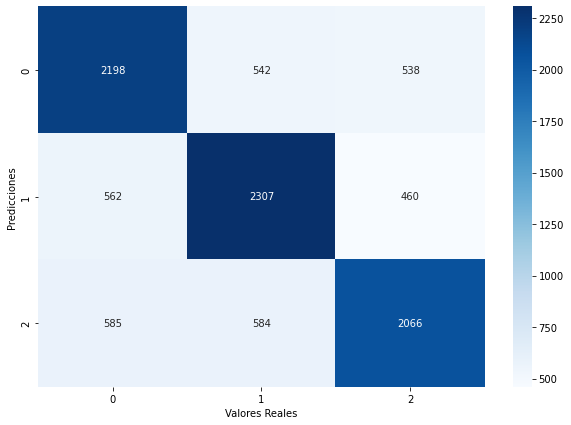

In [25]:
cm = metrics.confusion_matrix(labels_val, predictions_valid)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")

In [34]:
def get_metrics(Y_valid, Y_valid_p):
  valid_metrics = []
  
  matriz_conf_valid = metrics.confusion_matrix(Y_valid, Y_valid_p)
  sn.heatmap(matriz_conf_valid,annot=True,cmap='Blues')

  #accuracy
  valid_metrics.append(metrics.accuracy_score(Y_valid, Y_valid_p))
  #precision
  valid_metrics.append(metrics.precision_score(Y_valid, Y_valid_p, average='macro'))
  #recall
  valid_metrics.append(metrics.recall_score(Y_valid, Y_valid_p, average='macro'))
  #f1-score
  valid_metrics.append(metrics.f1_score(Y_valid, Y_valid_p, average='macro'))

  metrics_valid = pd.DataFrame(valid_metrics, columns = ['Valores'] ,index = ['Accuracy','Precision','Recall','F1-score'])
  
  return metrics_valid

,Valores
Accuracy,0.667649
Precision,0.667796
Recall,0.667391
F1-score,0.667356


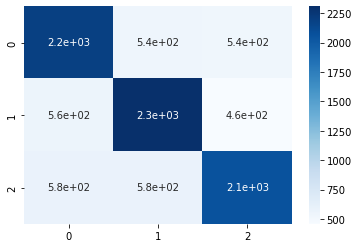

In [35]:
metrics_valid = get_metrics(labels_val, predictions_valid)
metrics_valid